In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-deep')

In [8]:
# Load data from local
redwine_data = pd.read_csv('winequality/winequality-red.csv', sep=';')
whitewine_data = pd.read_csv('winequality/winequality-white.csv', sep=';')
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
whitewine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
# combine two dataset
redwine_data['type'] = 'red'
whitewine_data['type'] = 'white'

In [15]:
wine_data = pd.concat([redwine_data, whitewine_data])
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


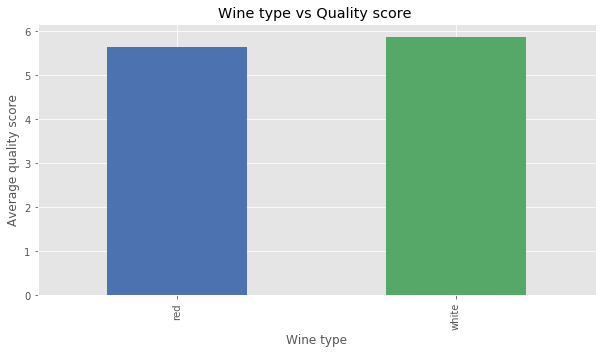

In [41]:
# compare the average quality score between white and red wine
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
wine_data.groupby('type')['quality'].mean().plot(kind='bar', ax=ax)
ax.set_xlabel('Wine type')
ax.set_ylabel('Average quality score')
ax.set_title('Wine type vs Quality score ')
plt.show()
# from the graph below, we can tell the average score of white wine is slightly higher than the red wine

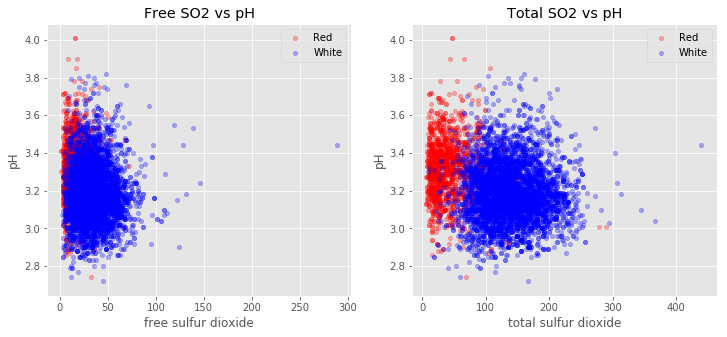

In [83]:
# Exploring whether free sulfur dioxide and total sulfur dioxide has anything to do with pH value
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
redwine_data.plot(kind='scatter', x='free sulfur dioxide', y='pH', ax=ax1, color='red', label='Red', alpha=0.3)
whitewine_data.plot(kind='scatter', x='free sulfur dioxide', y='pH', ax=ax1, color='blue', label='White', alpha=0.3)
redwine_data.plot(kind='scatter', x='total sulfur dioxide', y='pH', ax=ax2, color='red', label='Red', alpha=0.3)
whitewine_data.plot(kind='scatter', x='total sulfur dioxide', y='pH', ax=ax2, color='blue', label='White', alpha=0.3)
ax1.set_title('Free SO2 vs pH')
ax2.set_title('Total SO2 vs pH')
plt.show()
# From the graph below, we can see the relationship between free sulfur dioxide/total sulfur dioxide and pH value 
# are pretty low, this low correlation seems to present both in white and red wine

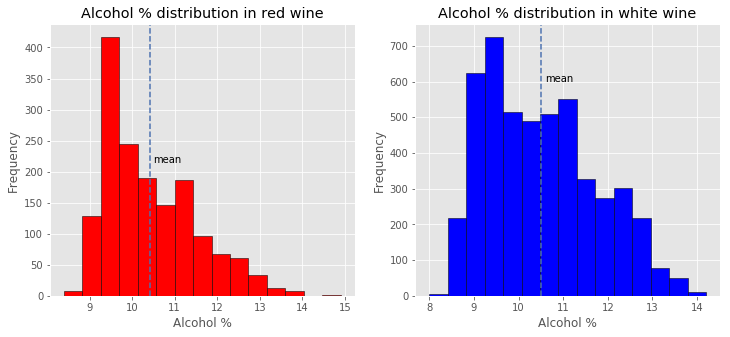

In [72]:
# Exploring the distribution of red and white wine in terms of alcohol degree
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
redwine_data['alcohol'].plot(kind='hist', ax=ax1, color='red', edgecolor='black', bins=15)
whitewine_data['alcohol'].plot(kind='hist', ax=ax2, color='blue', edgecolor='black', bins=15)
ax1.set_xlabel('Alcohol %')
ax2.set_xlabel('Alcohol %')
ax1.set_title('Alcohol % distribution in red wine')
ax2.set_title('Alcohol % distribution in white wine')
ax1.axvline(x=redwine_data['alcohol'].mean(), linestyle='--')
ax2.axvline(x=whitewine_data['alcohol'].mean(), linestyle='--')
ax1.text(x=10.5, y=215, s='mean')
ax2.text(x=10.6, y=600, s='mean')
plt.show()
# From the graph below, we can tell the average alcohol degree of white wine is slightly higher than the redwine
# Besides, most red wine has alcohol degree around 9.5% and most white wine has alcohol degree ranges from 9 to 11%

(2, 10)

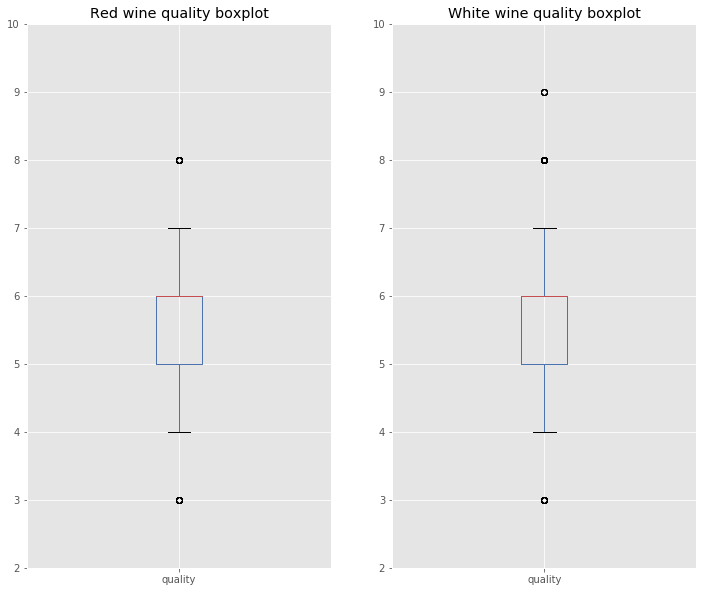

In [95]:
# Exploring the quality distribution of red and white wine
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
redwine_data['quality'].plot(kind='box', ax=ax1)
whitewine_data['quality'].plot(kind='box', ax=ax2)
ax1.set_title('Red wine quality boxplot')
ax2.set_title('White wine quality boxplot')
ax1.set_ylim([2, 10])
ax2.set_ylim([2, 10])
plt.show()
# Nothing excited here, the quality distribution between white and red wine looks pretty much the same, except
# some outlier exists more in white wine, which has a wine scored 9 